# Imports

In [1]:
# Hakim
import numpy as np
import pandas as pd
from sklearn.svm import *
from sklearn.metrics import (
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    confusion_matrix,
    balanced_accuracy_score,
    precision_recall_curve,
    roc_curve,
)
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
import gc
import pickle

# Data Preprocessing 

In [2]:
# Hakim
train_df = pd.read_csv(
    "/kaggle/input/frauddetection-data/fraudTrain.csv", nrows=100000
)  # no need for all the data
test_df = pd.read_excel("/kaggle/input/frauddetection-data/fraudTest.xlsx")

In [3]:
train_df.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
0,0,1/1/2019 0:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,0b242abb623afc578575680df30655b9,0
1,1,1/1/2019 0:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,1f76529f8574734946361c461b024d99,0
2,2,1/1/2019 0:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,a1a22d70485983eac12b5b88dad1cf95,0
3,3,1/1/2019 0:01,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,6b849c168bdad6f867558c3793159a81,0
4,4,1/1/2019 0:03,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,a41d7549acf90789359a9aa5346dcb46,0


In [4]:
test_df.head()

,ID,Time,Card Number,merchant,category,Amount,firstName,lastName,trans_num,is_fraud
0,0,2020-06-21 12:14:25,2291163933867240,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,2da90c7d74bd46a0caf3777415b3ebd3,0
1,1,2020-06-21 12:14:33,3573030041201290,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,324cc204407e99f51b0d6ca0055005e7,0
2,2,2020-06-21 12:14:53,3598215285024750,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,c81755dbbbea9d5c77f094348a7579be,0
3,3,2020-06-21 12:15:15,3591919803438420,fraud_Haley Group,misc_pos,60.05,Brian,Williams,2159175b9efe66dc301f149d3d5abf8c,0
4,4,2020-06-21 12:15:17,3526826139003040,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,57ff021bd3f328f8738bb535c302a31b,0


In [5]:
# train
train_df = pd.get_dummies(train_df, columns=["category", "merchant"], dtype=int)
# TODO Tebry

In [6]:
# test
test_df = pd.get_dummies(test_df, columns=["category", "merchant"], dtype=int)

# Checking that they both have the same order of columns

In [7]:
res = True
for i in range(0, train_df.columns.size):
    if train_df.columns[i] != test_df.columns[i]:
        res = False
        break
print(res)

True


# Feature Engineering

In [8]:
# TODO Tebry
# train


# Convert the 'Time' column to datetime format
train_df["Time"] = pd.to_datetime(train_df["Time"])


# Calculate the average transaction amount of all transactions
average_amount_all = train_df["Amount"].mean()

# Calculate the difference between current transaction amount and average of all transactions
train_df["Amount_diff_avg"] = train_df["Amount"] - average_amount_all

# Calculate the time difference between previous transactions for each card in hours
time_diff_seconds = train_df["Time"].diff().dt.total_seconds() % (24 * 3600)
train_df["Time_diff_prev_transaction"] = time_diff_seconds / 3600

columns_to_drop = ["ID", "Time", "Card Number", "firstName", "lastName", "trans_num"]
train_df.drop(columns=columns_to_drop, inplace=True)

train_df.dropna(inplace=True)
train_df.head()

,Amount,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,merchant_fraud_Zboncak LLC,merchant_fraud_Zboncak Ltd,"merchant_fraud_Zboncak, Rowe and Murazik",merchant_fraud_Zemlak Group,"merchant_fraud_Zemlak, Tillman and Cremin",merchant_fraud_Ziemann-Waters,"merchant_fraud_Zieme, Bode and Dooley",merchant_fraud_Zulauf LLC,Amount_diff_avg,Time_diff_prev_transaction
1,107.23,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,35.321768,0.000000
2,220.11,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,148.201768,0.000000
3,45.00,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-26.908232,0.016667
4,41.96,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-29.948232,0.033333
5,94.63,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,22.721768,0.016667


In [9]:
# TODO Tebry
# test

# Convert the 'Time' column to datetime format
test_df["Time"] = pd.to_datetime(test_df["Time"])


# Calculate the average transaction amount of all transactions
average_amount_all = test_df["Amount"].mean()

# Calculate the difference between current transaction amount and average of all transactions
test_df["Amount_diff_avg"] = test_df["Amount"] - average_amount_all

# Calculate the time difference between previous transactions for each card in hours
time_diff_seconds = test_df["Time"].diff().dt.total_seconds() % (24 * 3600)
test_df["Time_diff_prev_transaction"] = time_diff_seconds / 3600

columns_to_drop = ["ID", "Time", "Card Number", "firstName", "lastName", "trans_num"]
test_df.drop(columns=columns_to_drop, inplace=True)

test_df.dropna(inplace=True)
test_df.head()

,Amount,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,merchant_fraud_Zboncak LLC,merchant_fraud_Zboncak Ltd,"merchant_fraud_Zboncak, Rowe and Murazik",merchant_fraud_Zemlak Group,"merchant_fraud_Zemlak, Tillman and Cremin",merchant_fraud_Ziemann-Waters,"merchant_fraud_Zieme, Bode and Dooley",merchant_fraud_Zulauf LLC,Amount_diff_avg,Time_diff_prev_transaction
1,29.84,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-39.55281,0.002222
2,41.28,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,-28.11281,0.005556
3,60.05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-9.34281,0.006111
4,3.19,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-66.20281,0.000556
5,19.55,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,-49.84281,0.005556


In [10]:
y_train = np.array(train_df["is_fraud"])
y_test = np.array(test_df["is_fraud"])

In [11]:
train_df = train_df.drop("is_fraud", axis=1)
test_df = test_df.drop("is_fraud", axis=1)

* Memory managment because the data is so large

In [12]:
x_train = np.array(train_df)
del train_df
gc.collect()
x_test = np.array(test_df)
del test_df
gc.collect()

0

* To get the percentage of positives in the data 

In [13]:
# Hakim
y_train.sum() / len(y_train) * 100

0.9900099000990009

#  The data is highly imbalanced ,only 1% of the data is positive , which makes the model overfit

In [14]:
y_train.sum()  # number of positives in the data

990

* To make the data balanced , we will take all of the positive class in the data (990) and only 2750 of the negative class

In [15]:
# Hakim
balanced_x_train = np.concatenate(
    (x_train[np.where(y_train == 1)], x_train[np.where(y_train[:2750] == 0)])
)
balanced_y_train = np.concatenate(
    (y_train[np.where(y_train == 1)], y_train[np.where(y_train[:2750] == 0)])
)

* Doing the same for test data but this time to get accurate results , it doesn't have anythong to do with the model

In [16]:
balanced_x_test = np.concatenate(
    (x_test[np.where(y_test == 1)], x_test[np.where(y_test[:8000] == 0)])
)
balanced_y_test = np.concatenate(
    (y_test[np.where(y_test == 1)], y_test[np.where(y_test[:8000] == 0)])
)

* Shuffle the data so the model doesn't overfit 

In [17]:
# Hakim
np.random.seed(42)
np.random.shuffle(balanced_x_train)
np.random.seed(42)  # for some reason the seed has to be set twice
np.random.shuffle(balanced_y_train)

# Model Selection and Training

In [18]:
svm = SVC(kernel="rbf", gamma=0.4, C=1.0)
svm.fit(balanced_x_train, balanced_y_train)

SVC(gamma=0.4)

# Model Evaluation

In [19]:
# TODO Watany me4 h3ml 7aga
y_pred = svm.predict(balanced_x_test)  # getting predictions on test data for evaluation

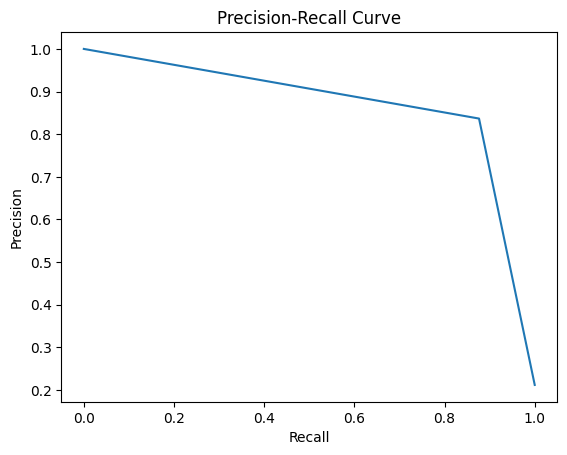

In [20]:
precisions, recalls, thresholds = precision_recall_curve(balanced_y_test, y_pred)
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()
p_score = precision_score(balanced_y_test, y_pred)
r_score = recall_score(balanced_y_test, y_pred)

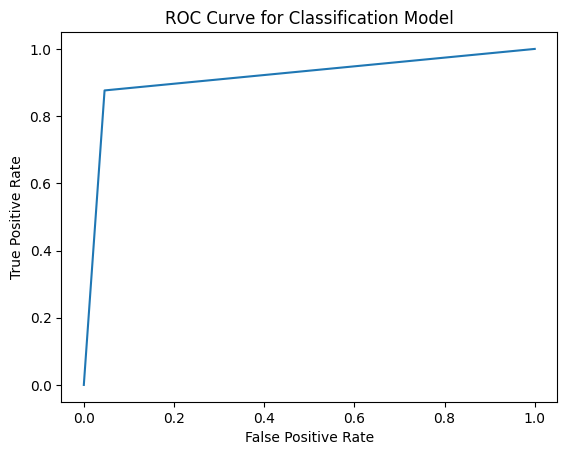

In [21]:
fpr, tpr, thresholds = roc_curve(balanced_y_test, y_pred)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Classification Model")
plt.show()
auc_prc = roc_auc_score(balanced_y_test, y_pred)

In [22]:
balanced_accuracy = balanced_accuracy_score(balanced_y_test, y_pred)
f1 = f1_score(balanced_y_test, y_pred)

print("balanced accuracy : ", balanced_accuracy)
print("F1 score          : ", f1)
print("precision score   : ", p_score)
print("recall score      : ", r_score)
print("AUC-PRC scoree    : ", auc_prc)

balanced accuracy :  0.9152276861602506
F1 score          :  0.8561020036429872
precision score   :  0.8366711170449488
recall score      :  0.8764568764568764
AUC-PRC scoree    :  0.9152276861602507


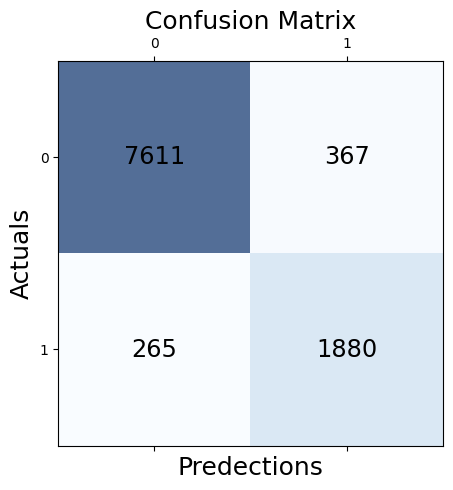

In [23]:
cm = confusion_matrix(balanced_y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.7)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va="center", ha="center", size="xx-large")
plt.xlabel("Predections", fontsize=18)
plt.ylabel("Actuals", fontsize=18)
plt.title("Confusion Matrix", fontsize=18)
plt.show()

# Deployment and Monitoring:

In [24]:
filename = "svm_model.pth"

with open(filename, "wb") as f:
    pickle.dump(svm, f)

print(f"Model saved to {filename}")
with open(filename, "rb") as f:
    loaded_svm_model = pickle.load(f)

print(f"Model loaded from {filename}")

Model saved to svm_model.pth
Model loaded from svm_model.pth


# Trying to take new input and passing it to the model

In [25]:
train_df = pd.read_csv(
    "/kaggle/input/frauddetection-data/fraudTrain.csv", nrows=100000
)  # no need for all the data

In [26]:
train_df.loc[len(train_df)] = [
    len(train_df),
    "2/27/2024 23:00",
    8800000000000000,
    "fraud_Kessler Group",
    "travel",
    10000.0,
    "Omar",
    "Elhakim",
    "fd4a6a1b893c2045d7310c70c1d9ea1d",
    1,
]

# We have to make the same tranformation on it 

In [27]:
train_df = pd.get_dummies(train_df, columns=["category", "merchant"], dtype=int)

# Convert the 'Time' column to datetime format
train_df["Time"] = pd.to_datetime(train_df["Time"])


# Calculate the average transaction amount of all transactions
average_amount_all = train_df["Amount"].mean()

# Calculate the difference between current transaction amount and average of all transactions
train_df["Amount_diff_avg"] = train_df["Amount"] - average_amount_all

# Calculate the time difference between previous transactions for each card in hours
time_diff_seconds = train_df["Time"].diff().dt.total_seconds() % (24 * 3600)
train_df["Time_diff_prev_transaction"] = time_diff_seconds / 3600

columns_to_drop = ["ID", "Time", "Card Number", "firstName", "lastName", "trans_num"]
train_df.drop(columns=columns_to_drop, inplace=True)

train_df.dropna(inplace=True)
train_df.tail()

,Amount,is_fraud,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,merchant_fraud_Zboncak LLC,merchant_fraud_Zboncak Ltd,"merchant_fraud_Zboncak, Rowe and Murazik",merchant_fraud_Zemlak Group,"merchant_fraud_Zemlak, Tillman and Cremin",merchant_fraud_Ziemann-Waters,"merchant_fraud_Zieme, Bode and Dooley",merchant_fraud_Zulauf LLC,Amount_diff_avg,Time_diff_prev_transaction
99996,8.75,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-63.257512,0.016667
99997,34.20,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-37.807512,0.000000
99998,73.11,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1.102488,0.016667
99999,9.08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-62.927512,0.033333
100000,10000.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,9927.992488,7.333333


In [28]:
r = np.array(train_df.iloc[-1].drop("is_fraud"))

In [29]:
r = r.reshape(1, -1)

In [30]:
loaded_svm_model.predict(r)

array([1])

# The loaded model made the right prediction on new unseen data